<a href="https://colab.research.google.com/github/vvvipindsm/Interview/blob/master/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
!pip install yfinance

import matplotlib.pyplot as plt
import warnings
import yfinance

warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 6.4 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [29]:
nifty_raw_data = yfinance.download (tickers = "^NSEI", start = "2008-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
stocks_raw_data = yfinance.download (tickers = "FEDERALBNK.NS", start = "2008-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df_comp = raw_data.copy()
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

In [32]:
df_comp = nifty_raw_data.copy()
df_stock = stocks_raw_data.copy()

df_stock=df_stock.asfreq('b')
df_stock=df_stock.fillna(method='ffill')

df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp = df_comp[-len(df_stock):]
df_comp['kpi'] = df_stock.Close[:]
df_comp['Qkpi'] = df_stock.Volume[:]
df_comp['nifty'] = df_comp.Close[:]

df_comp['ret_nifty'] = df_comp.nifty.pct_change(1).mul(100)
df_comp['norm_ret_nifty'] = df_comp.ret_nifty.div(df_comp.ret_nifty[1])*100

# # kpi
df_comp['ret_kpi'] = df_comp.kpi.pct_change(1).mul(100)
df_comp['norm_ret_kpi'] = df_comp.ret_kpi.div(df_comp.ret_kpi[1])*100

# # kpi volumn
df_comp['ret_Qkpi'] = df_comp.Qkpi.pct_change(1).mul(100)
df_comp['norm_ret_Qkpi'] = df_comp.ret_Qkpi.div(df_comp.ret_Qkpi[1])*100


df_comp.tail()

,Open,High,Low,Close,Volume,kpi,Qkpi,nifty,ret_nifty,norm_ret_nifty,ret_kpi,norm_ret_kpi,ret_Qkpi,norm_ret_Qkpi
Date,,,,,,,,,,,,,,
2022-06-20,15334.500000,15382.500000,15191.099609,15350.150391,260000.0,84.800003,9567545.0,15350.150391,0.370421,-146.948873,-2.863688,-235.992333,-7.509524,-172.287354
2022-06-21,15455.950195,15707.250000,15419.849609,15638.799805,262800.0,87.800003,8029209.0,15638.799805,1.880434,-745.981887,3.537736,291.539585,-16.078691,-368.885569
2022-06-22,15545.650391,15565.400391,15385.950195,15413.299805,220900.0,86.800003,4463288.0,15413.299805,-1.441927,572.022831,-1.138952,-93.859365,-44.411859,-1018.919634
2022-06-23,15451.549805,15628.450195,15367.500000,15556.650391,259200.0,86.949997,7559023.0,15556.650391,0.930045,-368.955581,0.172804,14.240525,69.359965,1591.291863
2022-06-24,15657.400391,15749.250000,15619.450195,15699.250000,219600.0,89.349998,9452966.0,15699.250000,0.916647,-363.640697,2.760209,227.464743,25.055394,574.833690


In [33]:


#divide into train and validation set

size = int(len(df_comp)*0.8)
train, valid = df_comp.iloc[:size], df_comp.iloc[size:]
# train = df_comp
# train.head()

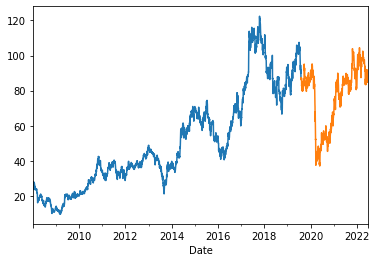

In [34]:
# plotting the data
train['kpi'].plot()
valid['kpi'].plot()
plt.show()

In [5]:
#building the model
!pip install pmdarima
from pmdarima.arima import auto_arima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 35.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [35]:
# train[['ret_Qkpi']][1:].tail()df_test[['ret_spx', 'ret_dax', 'ret_nikkei']]
para_index =1
# old modal
# model_auto = auto_arima(df.ret_ftse[1:], exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                      #  m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
model = auto_arima(train.ret_kpi[para_index:],exogenous = train[['ret_nifty']][para_index:], 
                    m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
# model.fit(train.ret_ftse[para_index:])



In [37]:
start_date = "2021-01-23"

end_date = "2022-05-23"
df_auto_pred = pd.DataFrame(model.predict(n_periods = len(valid[start_date:end_date]),
                            exogenous = valid[['ret_nifty']][start_date:end_date]),
                            index = valid[start_date:end_date].index)

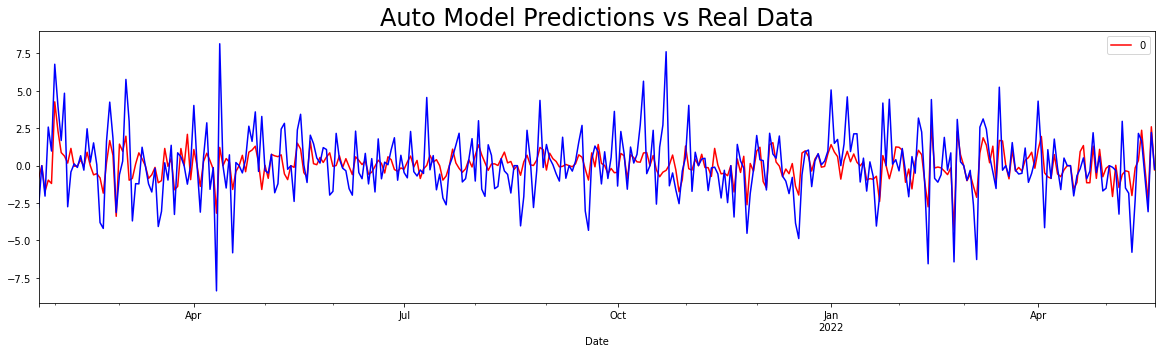

In [39]:


df_auto_pred.plot(figsize = (20,5), color = "red")
valid.ret_kpi[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()